<B>This NoteBook will be used for CapStone Project.</B></n></n>

<H3>Project Name : Movie Ticket based Restaurant Recommendation System</H3>  

Summary : This project provides the restaurant recommendation to people who has booked movies ticket in surronding area of Movie Theater.
    
    Below are few sample example of predicted recommendation
i)	If movie show end time is in after noon it will recommend Restaurant for dinner.
    
ii)	If movie show end time is evening it will recommend Café shop. 
    
iii)	If booked movie is Chinese movie it will recommend Chinese Restaurant



<B>Data for project :</B>
    The data for recommendation can be get from Movies Theater Booking data base

Those Ticket booking data consists of basic fields like below.
TheaterID, TheaterName, TheaterAddr, TheaterPincode, MovieID, MovieName, MovieCategory, MovieStarTime, MovieEndTime, CustName, Gender, Age, Mobile, Ticktcount, ScreeNo


We will read Moviews Ticket data and create analysis on booking data.
As a sample we are just considering one Movie Theater and two movies

Lets read sample 'Movies_BookingData.csv' and analyze it.

In [1]:
import random # library for random number generation
import numpy as np # library for vectorized computation
import pandas as pd # library to process data as dataframes

import matplotlib.pyplot as plt # plotting library
# backend for rendering plots within the browser
%matplotlib inline 


booking = pd.read_csv('Movies_BookingData.csv')
booking

,TheaterID,TheaterName,TheaterAddr,TheaterPincode,MovieID,MovieName,MovieCategory,MovieStarTime,MovieEndTime,Date,CustName,Gender,Age,Mobile,Ticktcount,ScreeNo
0,TH1,Cineplex Cinema,Central Toronto,M4N,JUSPAK,Jurassic Park,American,18:00:00,21:00:00,20-Oct-18,AAAA,M,23,9890098900,2,2
1,TH1,Cineplex Cinema,Central Toronto,M4N,JUSPAK,Jurassic Park,American,18:00:00,21:00:00,20-Oct-18,BBBB,F,30,8880088800,3,2
2,TH1,Cineplex Cinema,Central Toronto,M4N,JUSPAK,Jurassic Park,American,18:00:00,21:00:00,20-Oct-18,CCCC,M,60,8501585015,2,2
3,TH1,Cineplex Cinema,Central Toronto,M4N,JUSPAK,Jurassic Park,American,18:00:00,21:00:00,20-Oct-18,DDDD,M,18,9800098000,2,2
4,TH1,Cineplex Cinema,Central Toronto,M4N,JUSPAK,Jurassic Park,American,18:00:00,21:00:00,20-Oct-18,EEEE,F,45,7505075050,3,2
5,TH1,Cineplex Cinema,Central Toronto,M4N,JUSPAK,Jurassic Park,American,18:00:00,21:00:00,20-Oct-18,FFFF,M,75,8550085500,2,2
6,TH1,Cineplex Cinema,Central Toronto,M4N,JUSPAK,Jurassic Park,American,18:00:00,21:00:00,20-Oct-18,GGGG,F,35,9450094500,2,2
7,TH1,Cineplex Cinema,Central Toronto,M4N,JUSPAK,Jurassic Park,American,18:00:00,21:00:00,20-Oct-18,HHHH,M,45,8750087500,2,2
8,TH1,Cineplex Cinema,Central Toronto,M4N,JUSPAK,Jurassic Park,American,18:00:00,21:00:00,20-Oct-18,IIII,F,55,9645096450,3,2
9,TH1,Cineplex Cinema,Central Toronto,M4N,JUSPAK,Jurassic Park,American,18:00:00,21:00:00,20-Oct-18,JJJJ,M,60,8865088650,2,2


<H3>Movies booking ticket data for any anomolies and data preparation </H3>

In [2]:
booking.describe(include='all')

,TheaterID,TheaterName,TheaterAddr,TheaterPincode,MovieID,MovieName,MovieCategory,MovieStarTime,MovieEndTime,Date,CustName,Gender,Age,Mobile,Ticktcount,ScreeNo
count,20,20,20,20,20,20,20,20,20,20,20,20,20.000000,2.000000e+01,20.000000,20.000000
unique,1,1,1,1,2,2,2,2,2,1,20,2,NaN,NaN,NaN,NaN
top,TH1,Cineplex Cinema,Central Toronto,M4N,JUSPAK,Harry Potter,English,15:00:00,21:00:00,20-Oct-18,MMMM,F,NaN,NaN,NaN,NaN
freq,20,20,20,20,10,10,10,10,10,20,1,11,NaN,NaN,NaN,NaN
mean,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,36.100000,8.983790e+09,2.300000,1.500000
std,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,15.963445,7.129775e+08,0.470162,0.512989
min,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,18.000000,7.505075e+09,2.000000,1.000000
25%,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,24.500000,8.550161e+09,2.000000,1.000000
50%,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,30.000000,8.872639e+09,2.000000,1.500000
75%,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,45.000000,9.645121e+09,3.000000,2.000000


<H3>Step</H3>
i) Looking at above data result set most of the categorical data is not use full for predictive recommendation of Restaurant hence we will not consider it

ii ) By data analysis TheaterPincod (Location of Movie Theater),Gender of customer, Age of Customer, Movie show end time are probable fields which are useful for model building.

<H3>Lets do Explotory Data analysis on each individual field and prepare data for model</H3>

Check the movie booking average age by movie.

In [3]:

avgage = booking[['MovieName','Age']]
avgage = avgage.groupby(['MovieName']).mean()
avgage

,Age
MovieName,
Harry Potter,27.6
Jurassic Park,44.6



<H4>Lets classify moviewise avarage age of booking </H4>

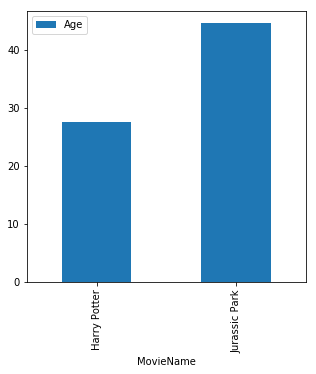

In [4]:
avgage.plot(kind='bar',figsize=(5, 5))

<H3>Check the age for mean and and any outlier for the age</H3>

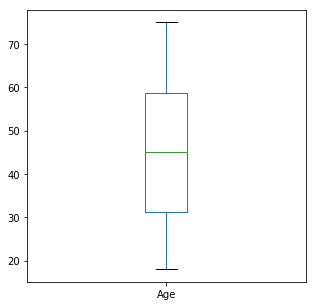

In [5]:

Mbooking = booking[['MovieName','Age']]
Jbooking = Mbooking[Mbooking['MovieName'] == 'Jurassic Park']
Jbooking.plot(kind='box',figsize=(5, 5))

Now Check for Movie <B>Harry Potter</B>

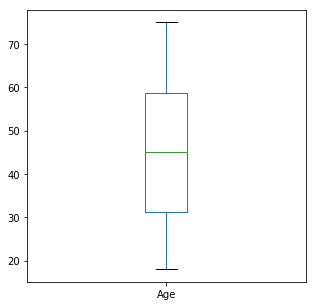

In [6]:
Mbooking = booking[['MovieName','Age']]
Hbooking = Mbooking[Mbooking['MovieName'] == 'Jurassic Park']
Hbooking.plot(kind='box',figsize=(5, 5))

<H3><B>Movies End time</B> is one of the key field to recommend the restaurant</H3>
<H4>Lets Analyse data, this field is time field, as we need to take decision based on show end time</H4>

In [7]:
booking[['MovieName','MovieEndTime']]

,MovieName,MovieEndTime
0,Jurassic Park,21:00:00
1,Jurassic Park,21:00:00
2,Jurassic Park,21:00:00
3,Jurassic Park,21:00:00
4,Jurassic Park,21:00:00
5,Jurassic Park,21:00:00
6,Jurassic Park,21:00:00
7,Jurassic Park,21:00:00
8,Jurassic Park,21:00:00
9,Jurassic Park,21:00:00


<H4>Looking at above Movie end time it is Categorical variable with different values in this field</H4>
Using <Binning> Lets divide this data in diffrent bins   
    
    i)  10 Hours to 17 Hours  ===> Afternoon (1)  
    ii) 17 Hours to 20 Hours  ===> Evening (2)
    iii)20 Hours to 01 Hours  ===> Night   (3)
    iv) 01 Hours to 10 Hours  ===> Morning (4)

In [8]:

i=0
for endtime in booking['MovieEndTime']:    
    if (int(endtime[0:2]) >= 11 and int(endtime[0:2]) <=16):
        booking.loc[i,'MovieBin'] = 1 ### AfterNoon
    elif (int(endtime[0:2]) >= 17 and int(endtime[0:2]) <=19):
        booking.loc[i,'MovieBin'] = 2 ### Evening
    elif (int(endtime[0:2]) >= 20 and int(endtime[0:2]) <=24):
        booking.loc[i,'MovieBin'] = 3 ### Night
    elif (int(endtime[0:2]) >= 1 and int(endtime[0:2]) <=10):
        booking.loc[i,'MovieBin'] = 4 ### Morning
    i = i+1


<H4>Just check MovieBin got classified properly or not</H4>

    i)  10 Hours to 17 Hours  ===> Afternoon (1)   
    ii) 17 Hours to 20 Hours  ===> Evening (2)
    iii)20 Hours to 01 Hours  ===> Night   (3)
    iv) 01 Hours to 10 Hours  ===> Morning (4)

In [9]:
booking[['MovieName','MovieEndTime','MovieBin']]


,MovieName,MovieEndTime,MovieBin
0,Jurassic Park,21:00:00,3.0
1,Jurassic Park,21:00:00,3.0
2,Jurassic Park,21:00:00,3.0
3,Jurassic Park,21:00:00,3.0
4,Jurassic Park,21:00:00,3.0
5,Jurassic Park,21:00:00,3.0
6,Jurassic Park,21:00:00,3.0
7,Jurassic Park,21:00:00,3.0
8,Jurassic Park,21:00:00,3.0
9,Jurassic Park,21:00:00,3.0


<H3>Install the required dependancy the libraries required to for Four Squre and geograph</H3>

In [10]:
import json # library to handle JSON files

!conda install -c conda-forge geopy --yes # uncomment this line if you haven't completed the Foursquare API lab
from geopy.geocoders import Nominatim # convert an address into latitude and longitude values

import requests # library to handle requests
from pandas.io.json import json_normalize # tranform JSON file into a pandas dataframe

# Matplotlib and associated plotting modules
import matplotlib.cm as cm
import matplotlib.colors as colors

# import k-means from clustering stage
from sklearn.cluster import KMeans

!conda install -c conda-forge folium=0.5.0 --yes # uncomment this line if you haven't completed the Foursquare API lab
import folium # map rendering library
#import geocoder # import geocoder

print('Libraries imported.')

Solving environment: done

## Package Plan ##

  environment location: /home/jupyterlab/conda

  added / updated specs: 
    - geopy


The following packages will be downloaded:

    package                    |            build
    ---------------------------|-----------------
    openssl-1.0.2p             |       h470a237_1         3.1 MB  conda-forge
    certifi-2018.10.15         |        py36_1000         138 KB  conda-forge
    geopy-1.17.0               |             py_0          49 KB  conda-forge
    ca-certificates-2018.10.15 |       ha4d7672_0         135 KB  conda-forge
    conda-4.5.11               |        py36_1000         651 KB  conda-forge
    geographiclib-1.49         |             py_0          32 KB  conda-forge
    ------------------------------------------------------------
                                           Total:         4.1 MB

The following NEW packages will be INSTALLED:

    geographiclib:   1.49-py_0            conda-forge
    geopy:           

<H3>Get longitude and Latitude for Cineplex Cinemas Yonge-Dundas and VIP in Central Toronto </H3>

In [11]:
###Cineplex Cinemas Yonge-Dundas and VIP
address = 'Cineplex Cinemas Yonge-Dundas and VIP'

geolocator = Nominatim()
location = geolocator.geocode(address)
latitude = location.latitude
longitude = location.longitude
print('The geograpical coordinate of Cineplex Cinemas are {}, {}.'.format(latitude, longitude))

/home/jupyterlab/conda/lib/python3.6/site-packages/geopy/geocoders/osm.py:143: UserWarning: Using Nominatim with the default "geopy/1.17.0" `user_agent` is strongly discouraged, as it violates Nominatim's ToS https://operations.osmfoundation.org/policies/nominatim/ and may possibly cause 403 and 429 HTTP errors. Please specify a custom `user_agent` with `Nominatim(user_agent="my-application")` or by overriding the default `user_agent`: `geopy.geocoders.options.default_user_agent = "my-application"`. In geopy 2.0 this will become an exception.
  UserWarning


The geograpical coordinate of Cineplex Cinemas are 43.6566724, -79.3804743.


<H3>Create the Map Sorrounding Cineplex Cinema in Central Toronto.</H3>

In [12]:

# create map of New York using latitude and longitude values
map_cineplex = folium.Map(location=[latitude, longitude], zoom_start=15)

# add markers to map
#for lat, lng, borough, neighborhood in zip(neighborhoods['Latitude'], neighborhoods['Longitude'], neighborhoods['Borough'], neighborhoods['Neighborhood']):
label = '43.6566724,-79.3804743'

cineplex = folium.map.FeatureGroup()

cineplex.add_child(
folium.features.CircleMarker(
[latitude, longitude],
radius=5,
#popup='Cineplex',
color='blue',
fill=True,
fill_color='#3186cc',
fill_opacity=0.7#,
#parse_html=False
))

map_cineplex.add_child(cineplex)

folium.Marker([latitude, longitude],popup='Cineplex').add_to(map_cineplex)

#folium.CircleMarker(
#[latitude, longitude],
#radius=5,
#popup='Cineplex',
#color='blue',
#fill=True,
#fill_color='#3186cc',
#fill_opacity=0.7,
#parse_html=False).add_to(map_cineplex)  

#folium.Popup(label, popup='Cineplex').add_to(map_cineplex) 
map_cineplex

<H3>Define Four Square Credentials </H3>

In [13]:
CLIENT_ID = 'SQVKGR0U44VMICP3APRUE2MSENPQ5I5K3WIKMU1JIMIM5US2' # your Foursquare ID
CLIENT_SECRET = '02ZE3XTJBTRRDPU2EP3QYGEHYXJBX221ZEMBYKCANZUMYN2M' # your Foursquare Secret
VERSION = '20180605' # Foursquare API version

print('Your credentails:')
print('CLIENT_ID: ' + CLIENT_ID)
print('CLIENT_SECRET:' + CLIENT_SECRET)

Your credentails:
CLIENT_ID: SQVKGR0U44VMICP3APRUE2MSENPQ5I5K3WIKMU1JIMIM5US2
CLIENT_SECRET:02ZE3XTJBTRRDPU2EP3QYGEHYXJBX221ZEMBYKCANZUMYN2M


<h3>Now, let's get the top 100 venues that are within a radius of 500 meters from Cineplex Cinema, Central Toronto</h3>

In [14]:
#get it from privious cell and rename longitude latitude of Cineplex Cinema
Cineplex_lati = latitude 
Cineplex_long = longitude

LIMIT = 100 # limit of number of venues returned by Foursquare API

radius = 500 # define radius

 # create URL
url = 'https://api.foursquare.com/v2/venues/explore?&client_id={}&client_secret={}&v={}&ll={},{}&radius={}&limit={}'.format(
    CLIENT_ID, 
    CLIENT_SECRET, 
    VERSION, 
    Cineplex_lati, 
    Cineplex_long, 
    radius, 
    LIMIT)

url


'https://api.foursquare.com/v2/venues/explore?&client_id=SQVKGR0U44VMICP3APRUE2MSENPQ5I5K3WIKMU1JIMIM5US2&client_secret=02ZE3XTJBTRRDPU2EP3QYGEHYXJBX221ZEMBYKCANZUMYN2M&v=20180605&ll=43.6566724,-79.3804743&radius=500&limit=100'

Send the GET request and examine the resutls

In [94]:
results = requests.get(url).json()
#results

<B> Lets write function to get category form above JSON response</B>

In [16]:
def get_category_type(row):
    try:
        categories_list = row['categories']
    except:
        categories_list = row['venue.categories']
        
    if len(categories_list) == 0:
        return None
    else:
        return categories_list[0]['name']

<B>Now we are ready to clean the json and structure it into a pandas dataframe.</B>

In [17]:
venues = results['response']['groups'][0]['items']

nearby_venues = json_normalize(venues) # flatten JSON

# filter columns
filtered_columns = ['venue.name', 'venue.categories', 'venue.location.lat', 'venue.location.lng']
nearby_venues =nearby_venues.loc[:, filtered_columns]

# filter the category for each row
nearby_venues['venue.categories'] = nearby_venues.apply(get_category_type, axis=1)

# clean columns
nearby_venues.columns = [col.split(".")[-1] for col in nearby_venues.columns]

# Filter non eternary Store
nearby_venues = nearby_venues[~nearby_venues['categories'].str.contains("Store|Place|Shop|Spa|Book|Gym|Theater")]

nearby_venues

,name,categories,lat,lng
4,Salad King,Thai Restaurant,43.657533,-79.381585
5,Yonge-Dundas Square,Plaza,43.656125,-79.380622
7,Urban Herbivore,Vegetarian / Vegan Restaurant,43.654972,-79.380856
8,DAVIDsTEA,Tea Room,43.656586,-79.381167
9,Barberian's Steak House,Steakhouse,43.657755,-79.382177
11,The Queen and Beaver Public House,Gastropub,43.657472,-79.383524
12,Hokkaido Ramen Santouka らーめん山頭火,Ramen Restaurant,43.656435,-79.377586
13,The Senator Restaurant,Diner,43.655641,-79.379199
14,JOEY,American Restaurant,43.656094,-79.381878
18,The Black Canary Espresso Bar,Café,43.657029,-79.381385


<B>Now below two Dataframes are ready </B>  
i) Movies Ticket booking

ii)Restuarant/Cafe/Bars surrounding the Movie Theter

Using Decision tree classfication to predict top 5 recommendation for Dinning/Cafe/Bar venues.


<B>Model dicision tree condition will be as follows</B>  

i) Based on Movies Bin created (Afternoon, Evening, Night), If Bin value is 1 it will recommend restaurant for Lunch, if 2 it will suggest cafe, if 3 it will suggest Bar/ Dinner.  

ii) Next it will check MoviesLanguage if American it will recommend American restaurant, if Italian it will suggest Italian restaurant, if chinese it will suggest chinese restaurant.  

iii) Based on Gender if gender is Male it and Bin value is 3 it will suggest bar , if gender is female it will suggest dinner restaurant.

In [91]:
## Model to predict the recommendation for restaurants, Bar, Cafe, Tea shop

def venue_recommendation_model(cust_booking,nearvenus):
    if (cust_booking.iloc[0,16] == 1.0): # Its Afternoon, Recommendation for Lunch
        Cusine_Type = cust_booking.iloc[0,6]   ## Recomendation based on movies category e.g. Italian, Chinese
        if(nearby_venues['categories'].str.contains(Cusine_Type)):
            recommended_venus = nearby_venues[nearby_venues['categories'].str.contains(Cusine_Type)]
            return recommended_venus.head()  ## Top 5 cusise type based on Movies Category i.e. Italian, Japanese
        else:
            recommended_venus = nearby_venues[nearby_venues['categories'].str.contains("Restaurant")]
            return recommended_venus.head()
        
    elif (cust_booking.iloc[0,16] == 2.0): # Its Evening, Recommendation for cafe or Tea shop
        recommended_venus = nearby_venues[nearby_venues['categories'].str.contains("Tea|Café")]
        return recommended_venus.head()
    
    elif (cust_booking.iloc[0,16] == 3.0): # Its Night, Recommendation for Dinner/Bar
        if (cust_booking.iloc[0,12] >= 21 and cust_booking.iloc[0,11] == 'M'): #Check the age,Gender of the customer if greter than 21 suggest Bar else Dinner restaurant
            recommended_venus = nearby_venues[nearby_venues['categories'].str.contains("BAR|Bar")]
            return recommended_venus.head()
        else:
            recommended_venus = nearby_venues[nearby_venues['categories'].str.contains("Dinner|Restaurant")]
            return recommended_venus.head()
    
    elif (cust_booking.iloc[0,16] == 4.0): ## Its Morning, Recommendation for Brekfast, Tea, Cafe
        recommended_venus = nearby_venues[nearby_venues['categories'].str.contains("Breakfast|Tea|Pizza")]
        return recommended_venus.head()
        
    
    
    
 

In [90]:
## Check predictoin for any sample customer having Gender = 'M' and Age = 23 and Movies End Time = 21:00:00
bookingin = booking[booking['Mobile'] == 9890098900]
bookingin

,TheaterID,TheaterName,TheaterAddr,TheaterPincode,MovieID,MovieName,MovieCategory,MovieStarTime,MovieEndTime,Date,CustName,Gender,Age,Mobile,Ticktcount,ScreeNo,MovieBin
0,TH1,Cineplex Cinema,Central Toronto,M4N,JUSPAK,Jurassic Park,American,18:00:00,21:00:00,20-Oct-18,AAAA,M,23,9890098900,2,2,3.0


In [89]:
## Check predictoin for any sample customer it should be Bar as time is night

#bookingin = booking[booking['Mobile'] == 9890098900]
#bookingin
result = venue_recommendation_model(bookingin,nearby_venues)
result


,name,categories,lat,lng
32,The 3 Brewers,Beer Bar,43.655474,-79.380413
45,Duke's Refresher + Bar,Bar,43.658980,-79.382949
53,Jugo Juice,Juice Bar,43.656047,-79.380491
73,VIP Lounge & Billiards Club,Bar,43.658907,-79.382042
81,Reds Midtown Tavern,Wine Bar,43.659128,-79.382266


<B>The above predictive recommendation is correct as per the Model decision tree conditions</B>  
Now Lets analyse result for another set of customer having Movies end time in Evening and Gender female 

In [92]:
bookingin = booking[booking['Mobile'] == 8880188801]
bookingin

,TheaterID,TheaterName,TheaterAddr,TheaterPincode,MovieID,MovieName,MovieCategory,MovieStarTime,MovieEndTime,Date,CustName,Gender,Age,Mobile,Ticktcount,ScreeNo,MovieBin
11,TH1,Cineplex Cinema,Central Toronto,M4N,HARPOT,Harry Potter,English,15:00:00,18:00:00,20-Oct-18,LLLL,F,30,8880188801,3,1,2.0


<B>AS expected below result provides recommendation for Cate and Tea outlets as Movies end time is evening time</B>  

Hence model is providing result as it is.

In [93]:
result = venue_recommendation_model(bookingin,nearby_venues)
result

,name,categories,lat,lng
8,DAVIDsTEA,Tea Room,43.656586,-79.381167
18,The Black Canary Espresso Bar,Café,43.657029,-79.381385
25,Balzac's Coffee,Café,43.657854,-79.379200
34,Page One Cafe,Café,43.657772,-79.376073
43,Oakham Café,Café,43.658078,-79.378315
